In [1]:
from nodos import PreActivation, Sigmoide, CrossEntropy
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tqdm import tqdm
%matplotlib inline

In [2]:
# vamos a generar nuestros datos
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_informative=2, random_state=10)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [3]:
#vamos a inicializar nuestros nodos

#nodo de pre activacion
pre_activacion = PreActivation(input_size=x_train.shape[1], output_size=1)

#nodo de activacion
activacion = Sigmoide()

#nodo de funcion objetivo
cross_entropy = CrossEntropy()

In [4]:
# inicializamos nuestras epochs y tasa de aprendizaje
epochs = 1000
lr = 0.1

history_train = [] # aqui guardamos la actualizacion del error
history_test = []

for epoch in tqdm(range(epochs), desc='Entrenamiento'):
    # bueno este es el paso forward
    z = pre_activacion.forward(x_train)
    y_pred = activacion.forward(z)
    loss = cross_entropy.forward(y_pred, y_train)
    # vamos guardando los errores de los datos de entrenamiento
    history_train.append(loss)

    # ahora viene el paso backward
    grad_loss = cross_entropy.backward(y_pred, y_train)
    grad_activacion = activacion.backward(grad_loss)
    grad_weight, grad_bias = pre_activacion.backward(grad_activacion)

    # actualizacion de los pesos
    pre_activacion.weight -= lr * grad_weight
    pre_activacion.bias -= lr * grad_bias

    #paso forward en el conjunto de datos test (solo el paso forward)
    z_test = pre_activacion.forward(x_test)
    y_pred_test = activacion.forward(z_test)
    loss_test = cross_entropy.forward(y_pred_test, y_test)
    # vamos guardando los errores de los datos de prueba
    history_test.append(loss_test)


Entrenamiento: 100%|██████████| 1000/1000 [00:00<00:00, 4920.79it/s]


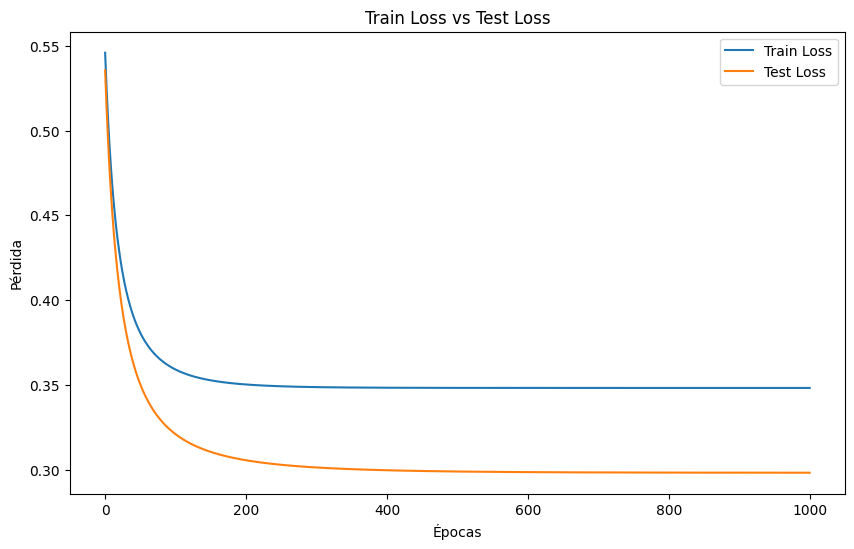

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(history_train, label='Train Loss')
plt.plot(history_test, label='Test Loss')
plt.title('Train Loss vs Test Loss')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

In [7]:
# vamos a ver que tan bien ha clasificado nuestro modelo para los datos de entrenamiento
from sklearn.metrics import classification_report

y_pred_class = activacion.predict(y_pred)
report = classification_report(y_train, y_pred_class)
print(report)

              precision    recall  f1-score   support

           0       0.86      0.85      0.85       343
           1       0.86      0.86      0.86       357

    accuracy                           0.86       700
   macro avg       0.86      0.86      0.86       700
weighted avg       0.86      0.86      0.86       700



In [8]:
y_pred_test_class = activacion.predict(y_pred_test)
report  = classification_report(y_test, y_pred_test_class)
print(report)

              precision    recall  f1-score   support

           0       0.88      0.91      0.89       157
           1       0.90      0.86      0.88       143

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300

